In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import linear_model
import seaborn as sns
import yfinance as yf
%matplotlib widget
sns.set_style("darkgrid")
sns.set(font_scale=1.7)


In [2]:
def pair(buy_ticker, sell_ticker, long_financials, short_financials):

    ticker1 = yf.Ticker(buy_ticker)
    ticker2 = yf.Ticker(sell_ticker)
    beta_ticker = yf.Ticker("SPY")

    dataFrame1 = ticker1.history(
        start='2010-1-1', actions=True, rounding=True)
    dataFrame2 = ticker2.history(
        start='2010-1-1', actions=True, rounding=True)
    spy = beta_ticker.history(
        start='2010-1-1', actions=True, rounding=True)

    ratio = dataFrame1.Close / dataFrame2.Close
    spread = dataFrame1.Close - dataFrame2.Close

    chart = fig, axes = plt.subplots(3, figsize=(18, 12))
    axes[0].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=dataFrame1, x="Date", y="Close",
                 ax=axes[0], label=buy_ticker)
    sns.lineplot(data=dataFrame2, x="Date", y="Close",
                 ax=axes[0], label=sell_ticker)
    axes[1].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=ratio, ax=axes[1])
    axes[2].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=spread, ax=axes[2])
    plt.tight_layout(pad=1)

    spy_ticker1 = pd.concat(
        [spy.Close[-500::], dataFrame1.Close[-500::]], axis=1)
    spy_ticker1.columns = ["SPY", buy_ticker]
    long_data_pct = np.log(spy_ticker1/spy_ticker1.shift())
    ticker1_cov = long_data_pct.cov().iloc[0, 1]
    ticker1_var = long_data_pct["SPY"].var()
    long_beta = ticker1_cov/ticker1_var
    print("Long BETA:", np.round(long_beta, 2))

    spy_ticker2 = pd.concat(
        [spy.Close[-500::], dataFrame2.Close[-500::]], axis=1)
    spy_ticker2.columns = ["SPY", sell_ticker]
    short_data_pct = np.log(spy_ticker2/spy_ticker2.shift())
    ticker2_cov = short_data_pct.cov().iloc[0, 1]
    ticker2_var = short_data_pct["SPY"].var()
    short_beta = ticker2_cov/ticker2_var
    print("Short BETA:", np.round(short_beta, 2))

    # financials:
    print(long_financials)
    print(short_financials)

    return chart


Long BETA: 1.31
Short BETA: 1.81
LONG position CHS P/E ratio=6.56, dividend: None, Gross Profit: 663998
SHORT position CDXS P/E ratio=None, dividend: None, Gross profit: 26626


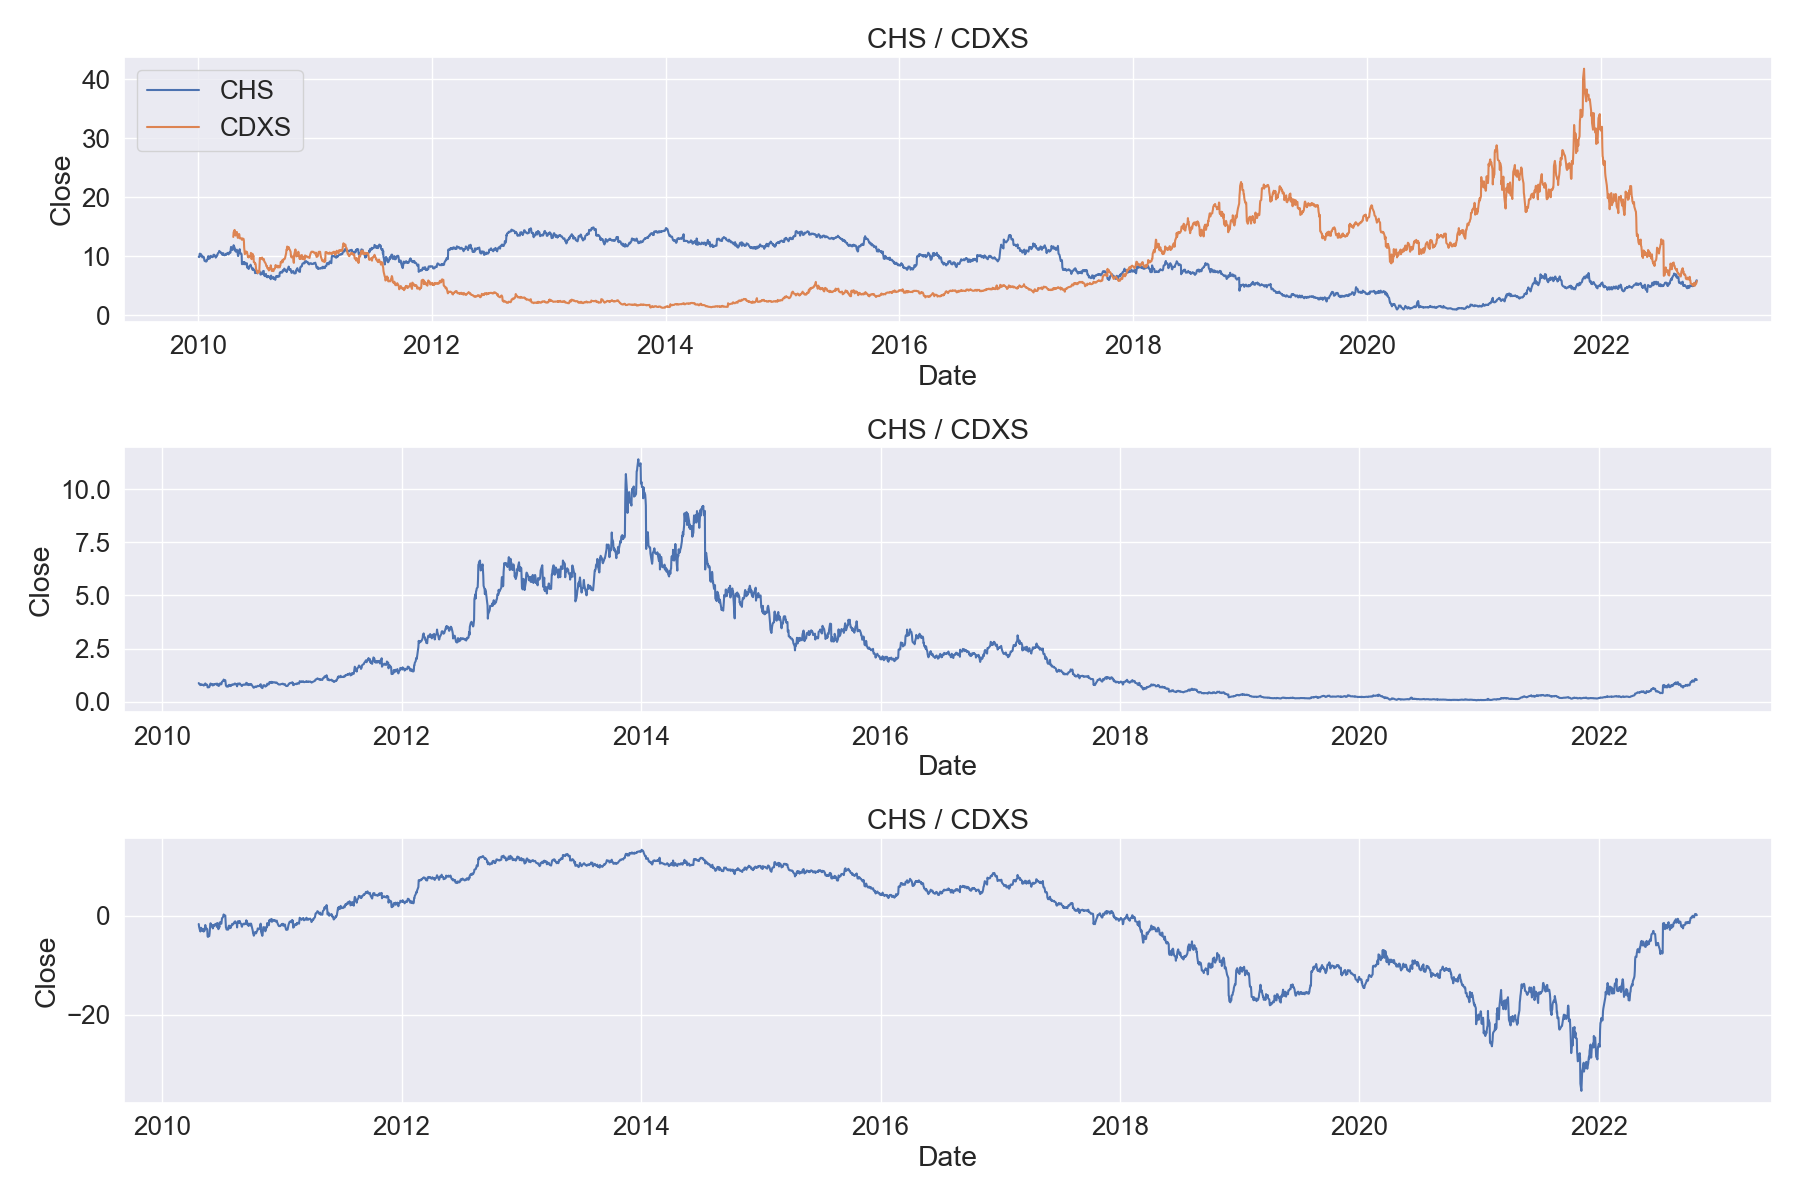

In [3]:
pair("CHS", "CDXS", "LONG position CHS P/E ratio=6.56, dividend: None, Gross Profit: 663998",
     "SHORT position CDXS P/E ratio=None, dividend: None, Gross profit: 26626");

Long BETA: 0.77
Short BETA: 1.57
LONG position ACAD P/E ratio = None, dividend: None, Gross profit: 225589
SHORT position CLF P/E ratio=2.43, dividend: None, Gross Profit: 4534000


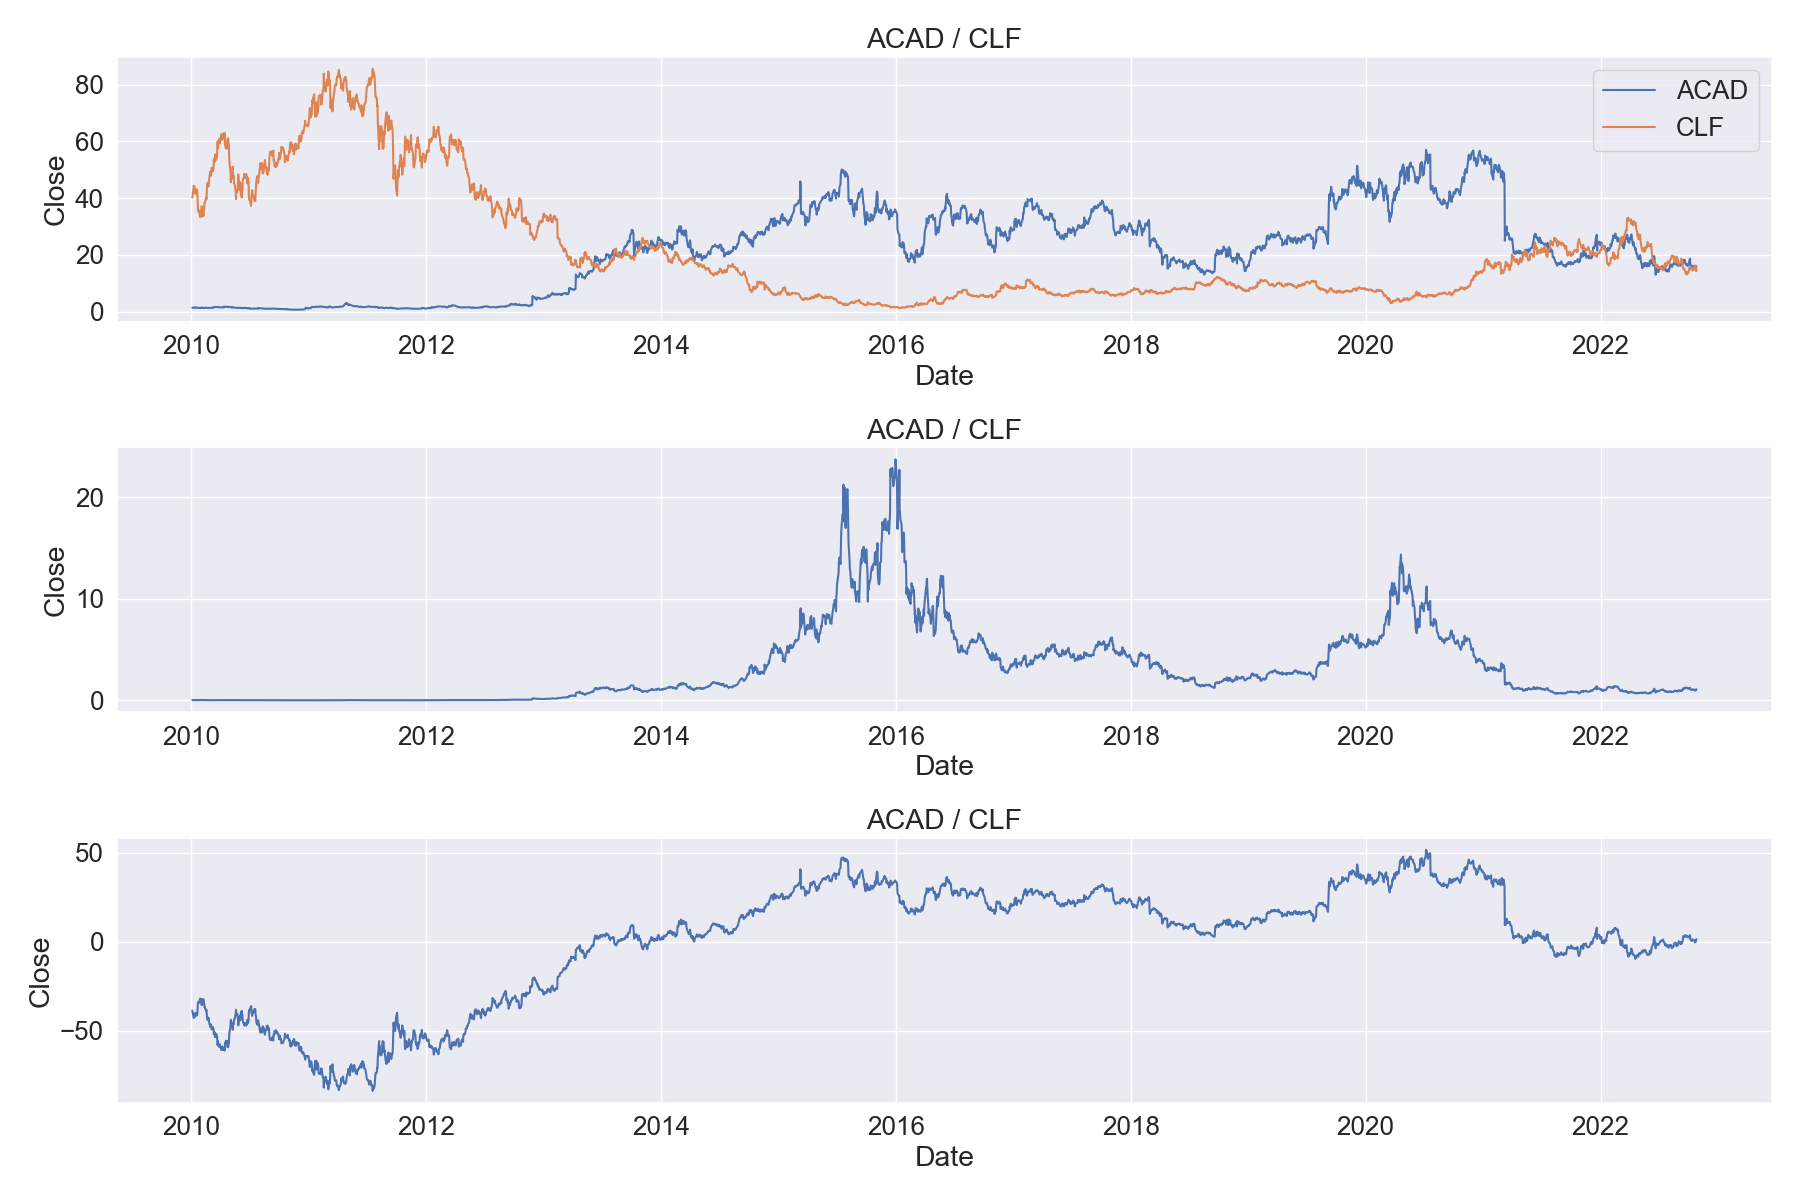

In [4]:
pair("ACAD", "CLF", "LONG position ACAD P/E ratio = None, dividend: None, Gross profit: 225589",
     "SHORT position CLF P/E ratio=2.43, dividend: None, Gross Profit: 4534000");

Long BETA: 1.13
Short BETA: 0.77
LONG position CIM P/E ratio=9.95, dividend: 0.143, Gross profit: 1057000
SHORT position CNX P/E ratio=None, dividend: None, Gross Profit: 1866027


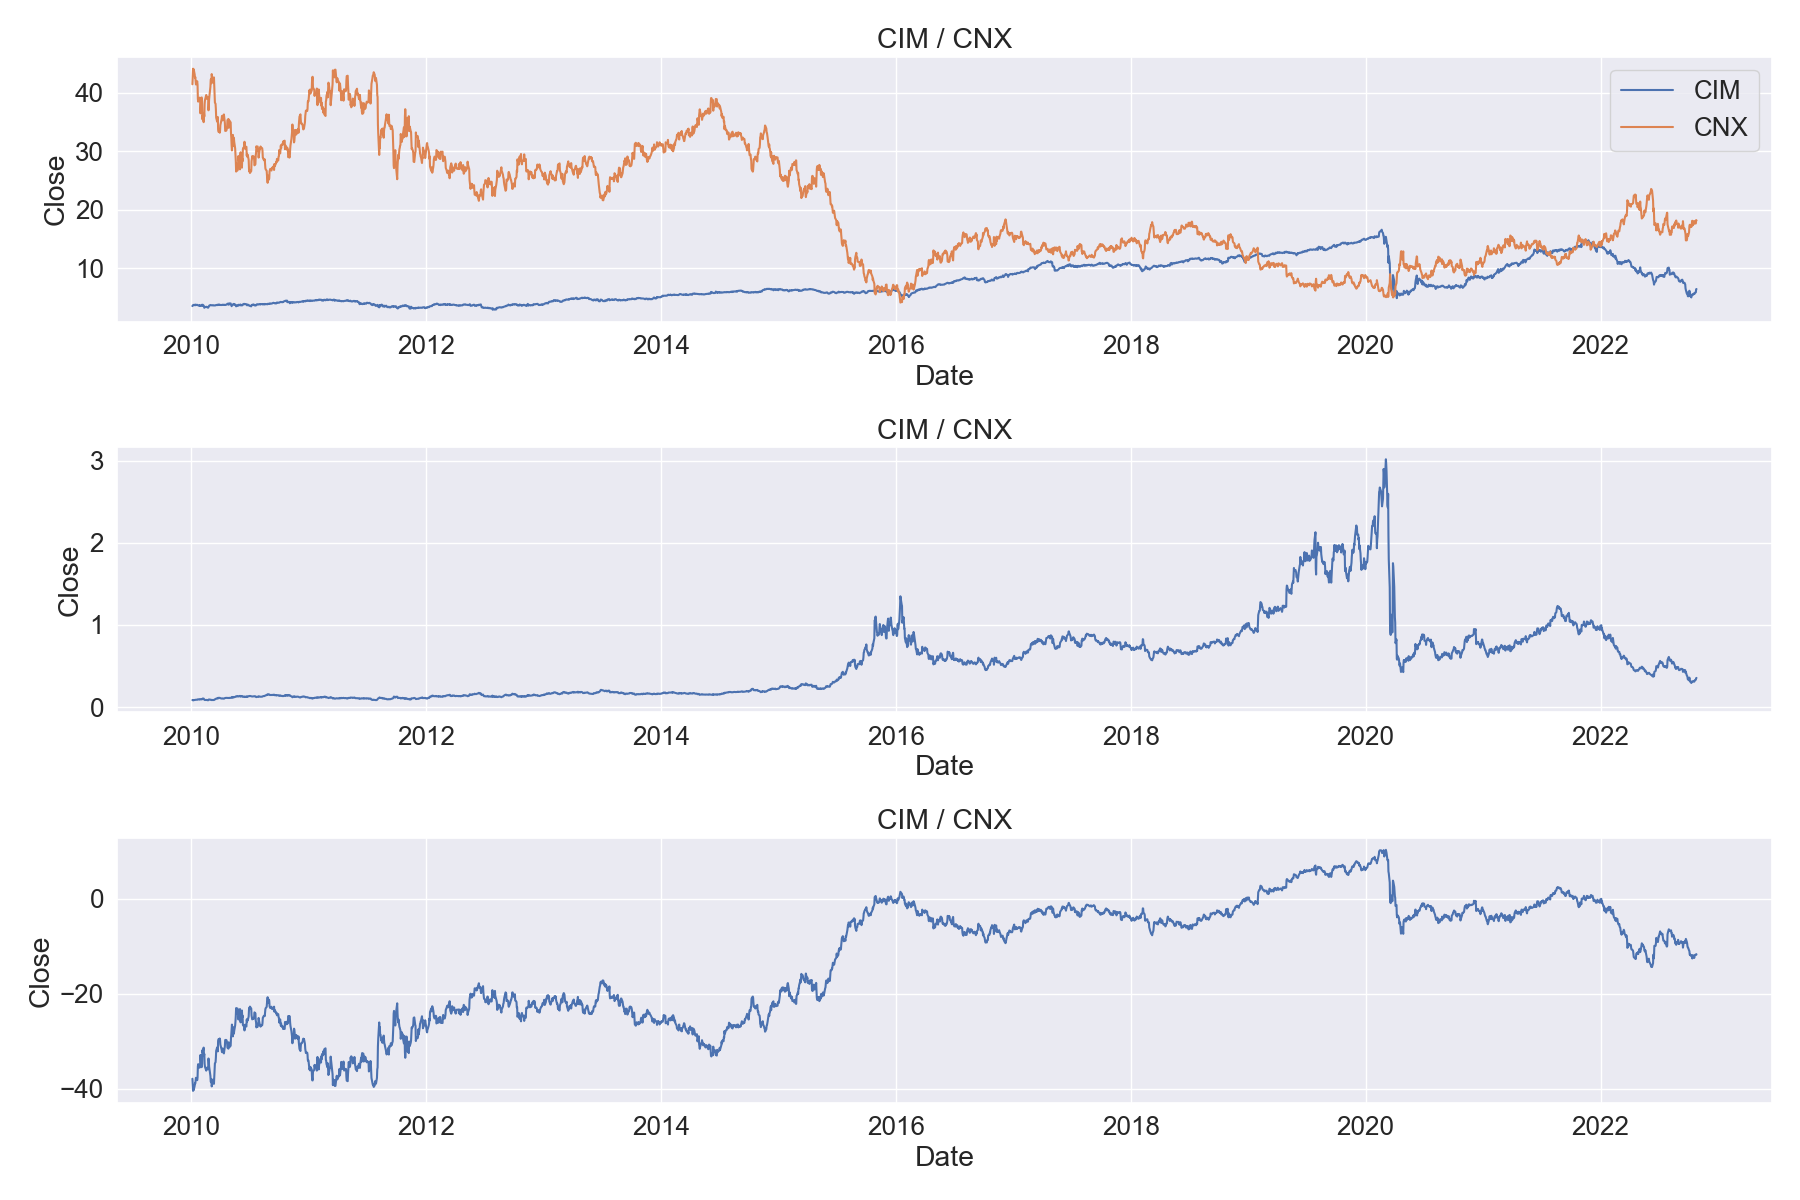

In [7]:
pair("CIM", "CNX", "LONG position CIM P/E ratio=9.95, dividend: 0.143, Gross profit: 1057000",
     "SHORT position CNX P/E ratio=None, dividend: None, Gross Profit: 1866027");

Long BETA: 0.95
Short BETA: 1.02
LONG position BDN P/E ratio = 38, dividend: 0.117, Gross profit: 269536
SHORT position CRK P/E ratio=14.66, dividend: None, Gross Profit: 1568061


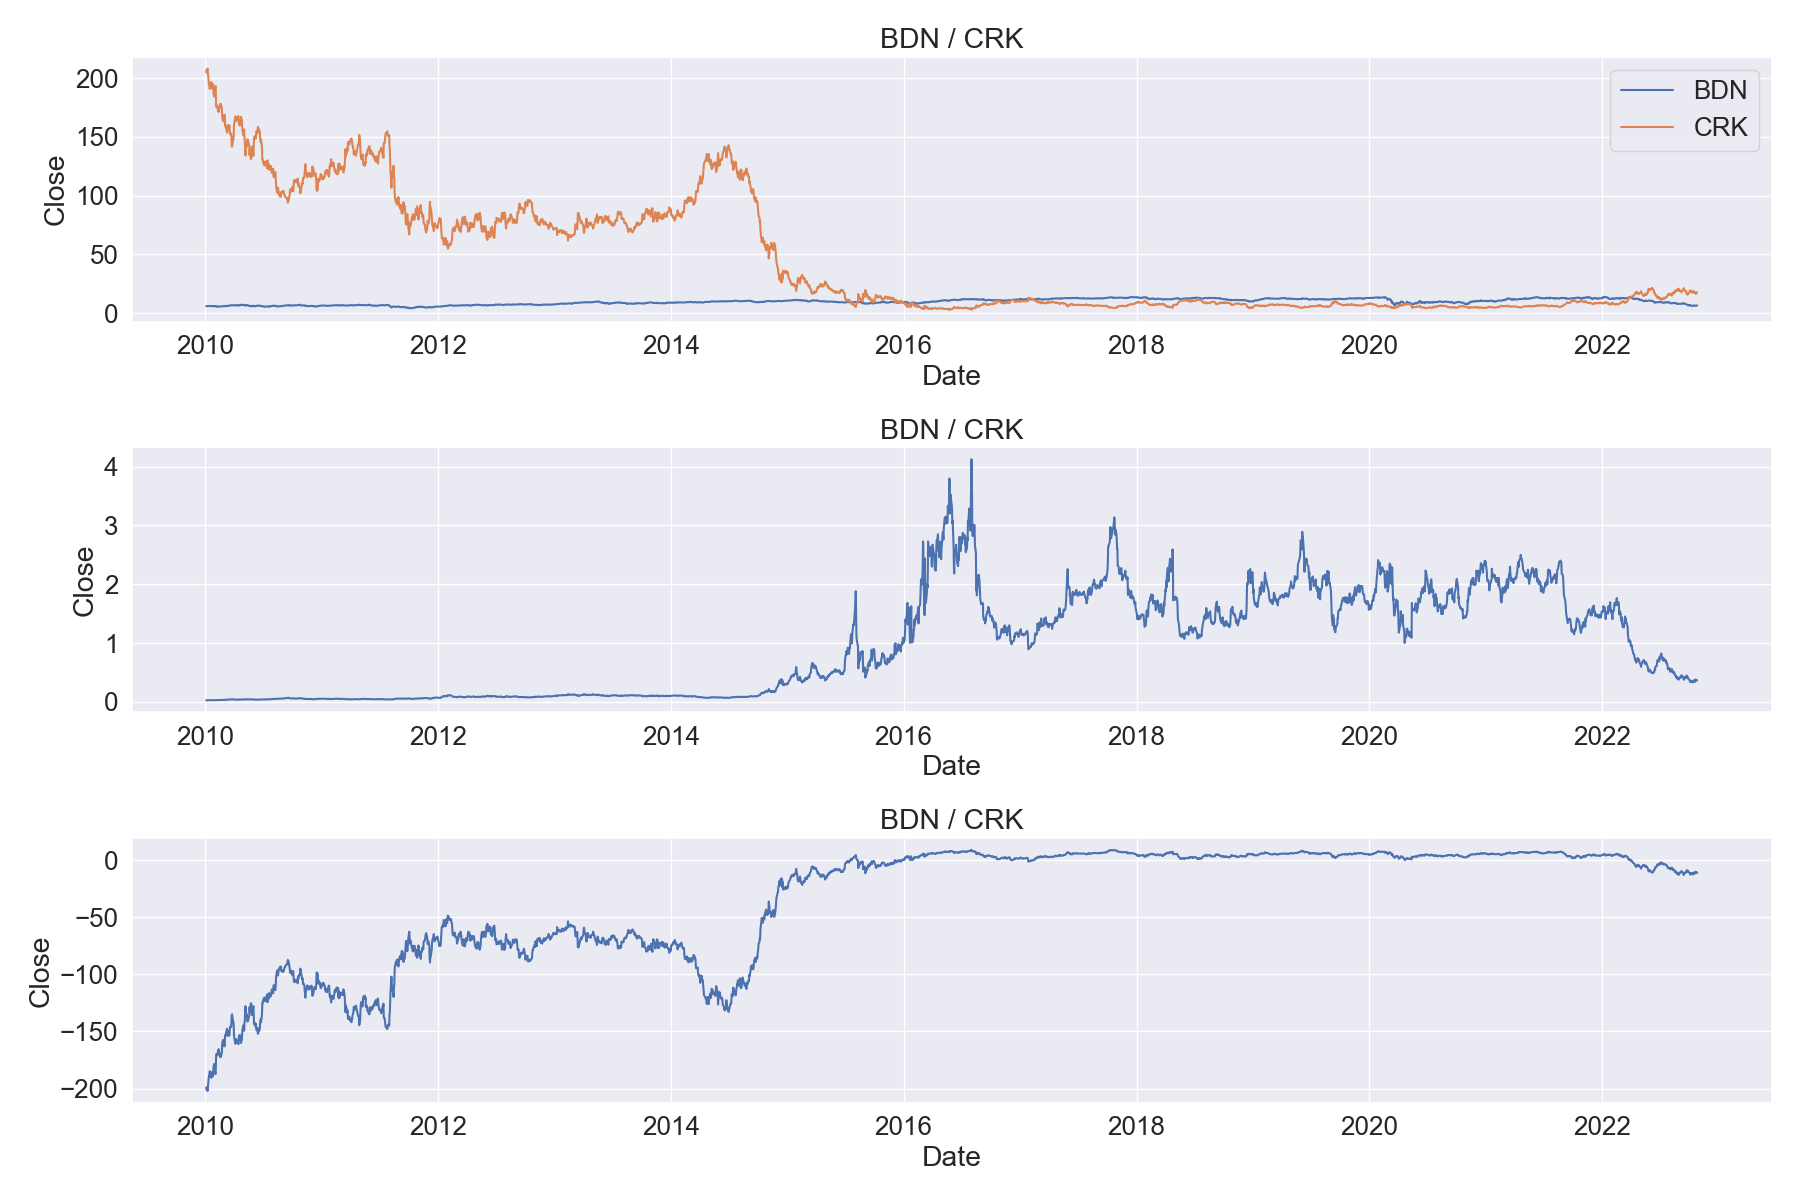

In [9]:
pair("BDN", "CRK", "LONG position BDN P/E ratio = 38, dividend: 0.117, Gross profit: 269536",
     "SHORT position CRK P/E ratio=14.66, dividend: None, Gross Profit: 1568061");

Long BETA: 1.14
Short BETA: 1.02
LONG position ARI P/E ratio = 5.87, dividend: 0.124, Gross profit: 299360
SHORT position CRK P/E ratio=14.66, dividend: None, Gross Profit: 1568061


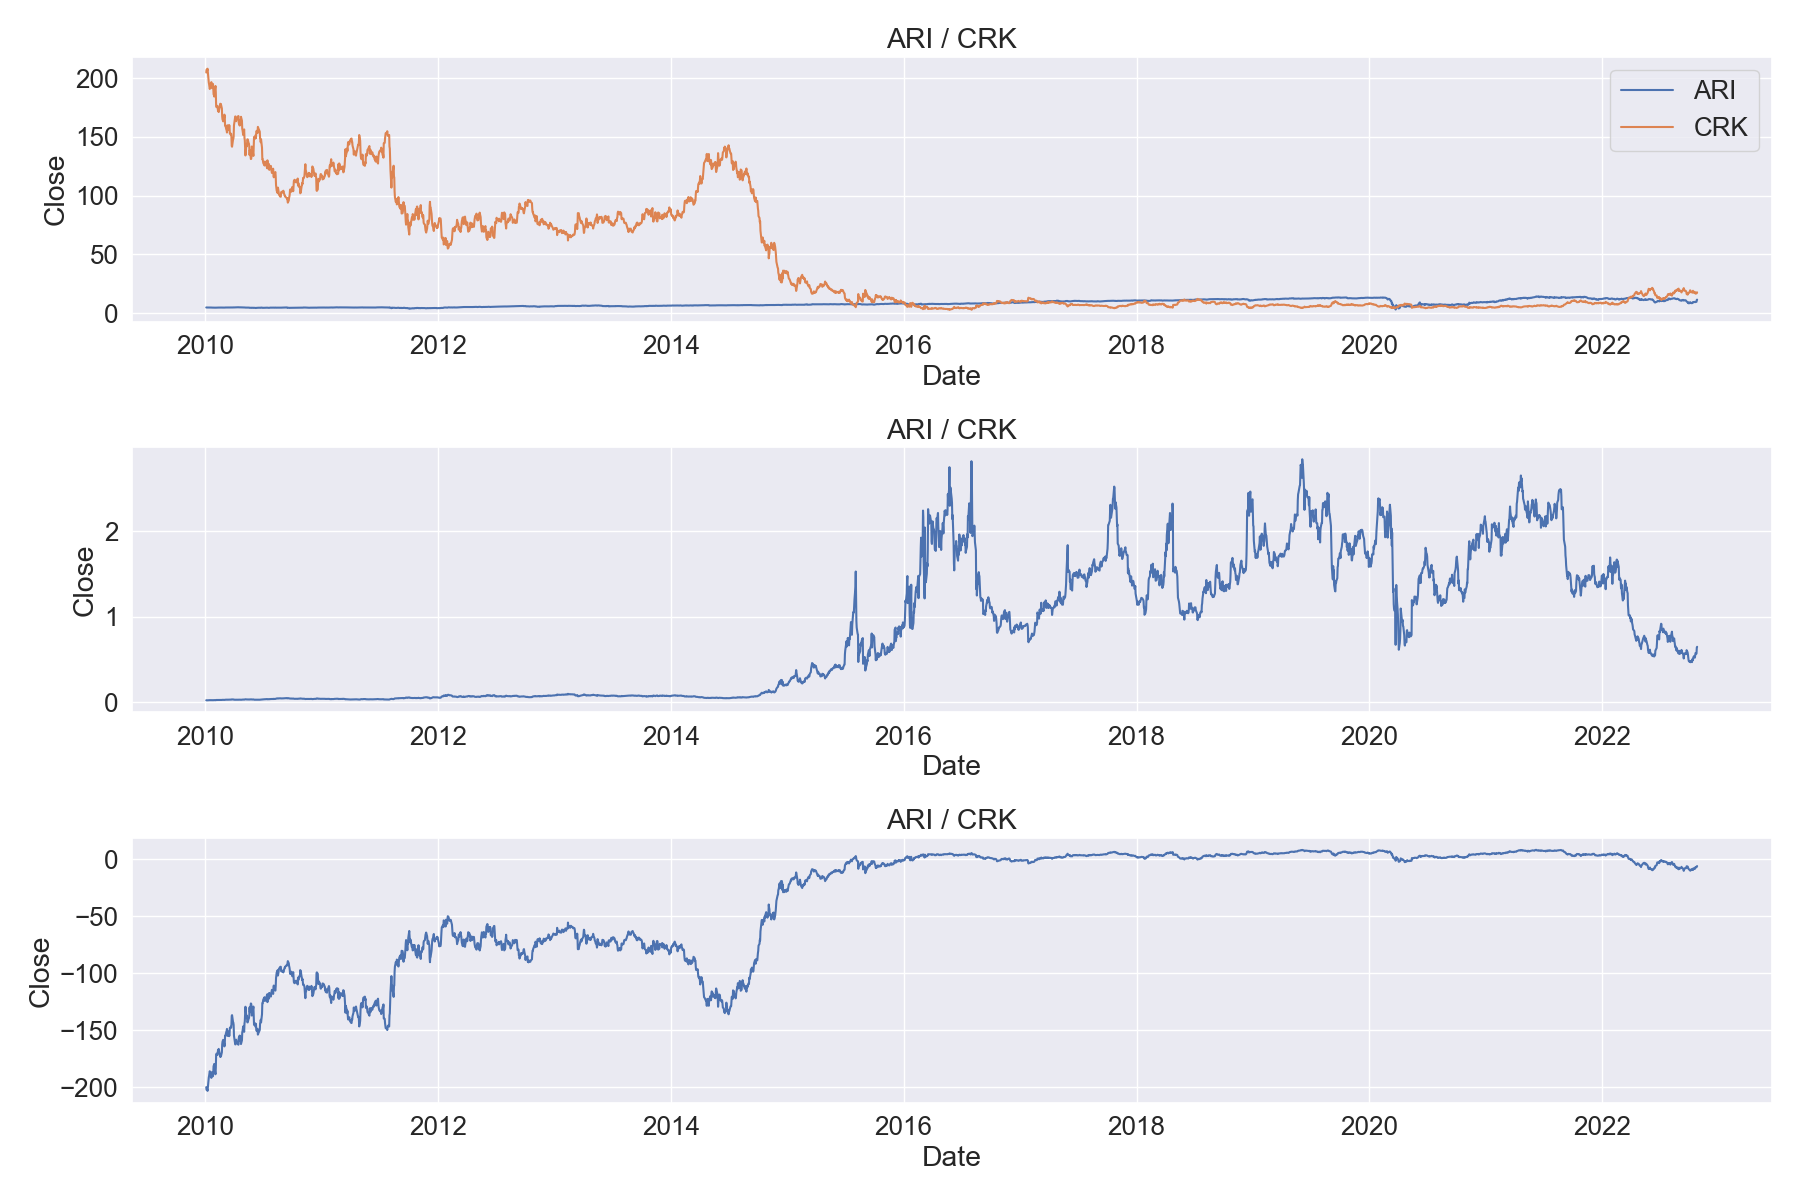

In [8]:
pair("ARI", "CRK", "LONG position ARI P/E ratio = 5.87, dividend: 0.124, Gross profit: 299360",
     "SHORT position CRK P/E ratio=14.66, dividend: None, Gross Profit: 1568061");

Long BETA: 0.76
Short BETA: 1.31
LONG position EXEL P/E ratio=18.78, dividend: None, Gross Profit: 1382097
SHORT position CHS P/E ratio=6.56, dividend: None, Gross profit: 663998


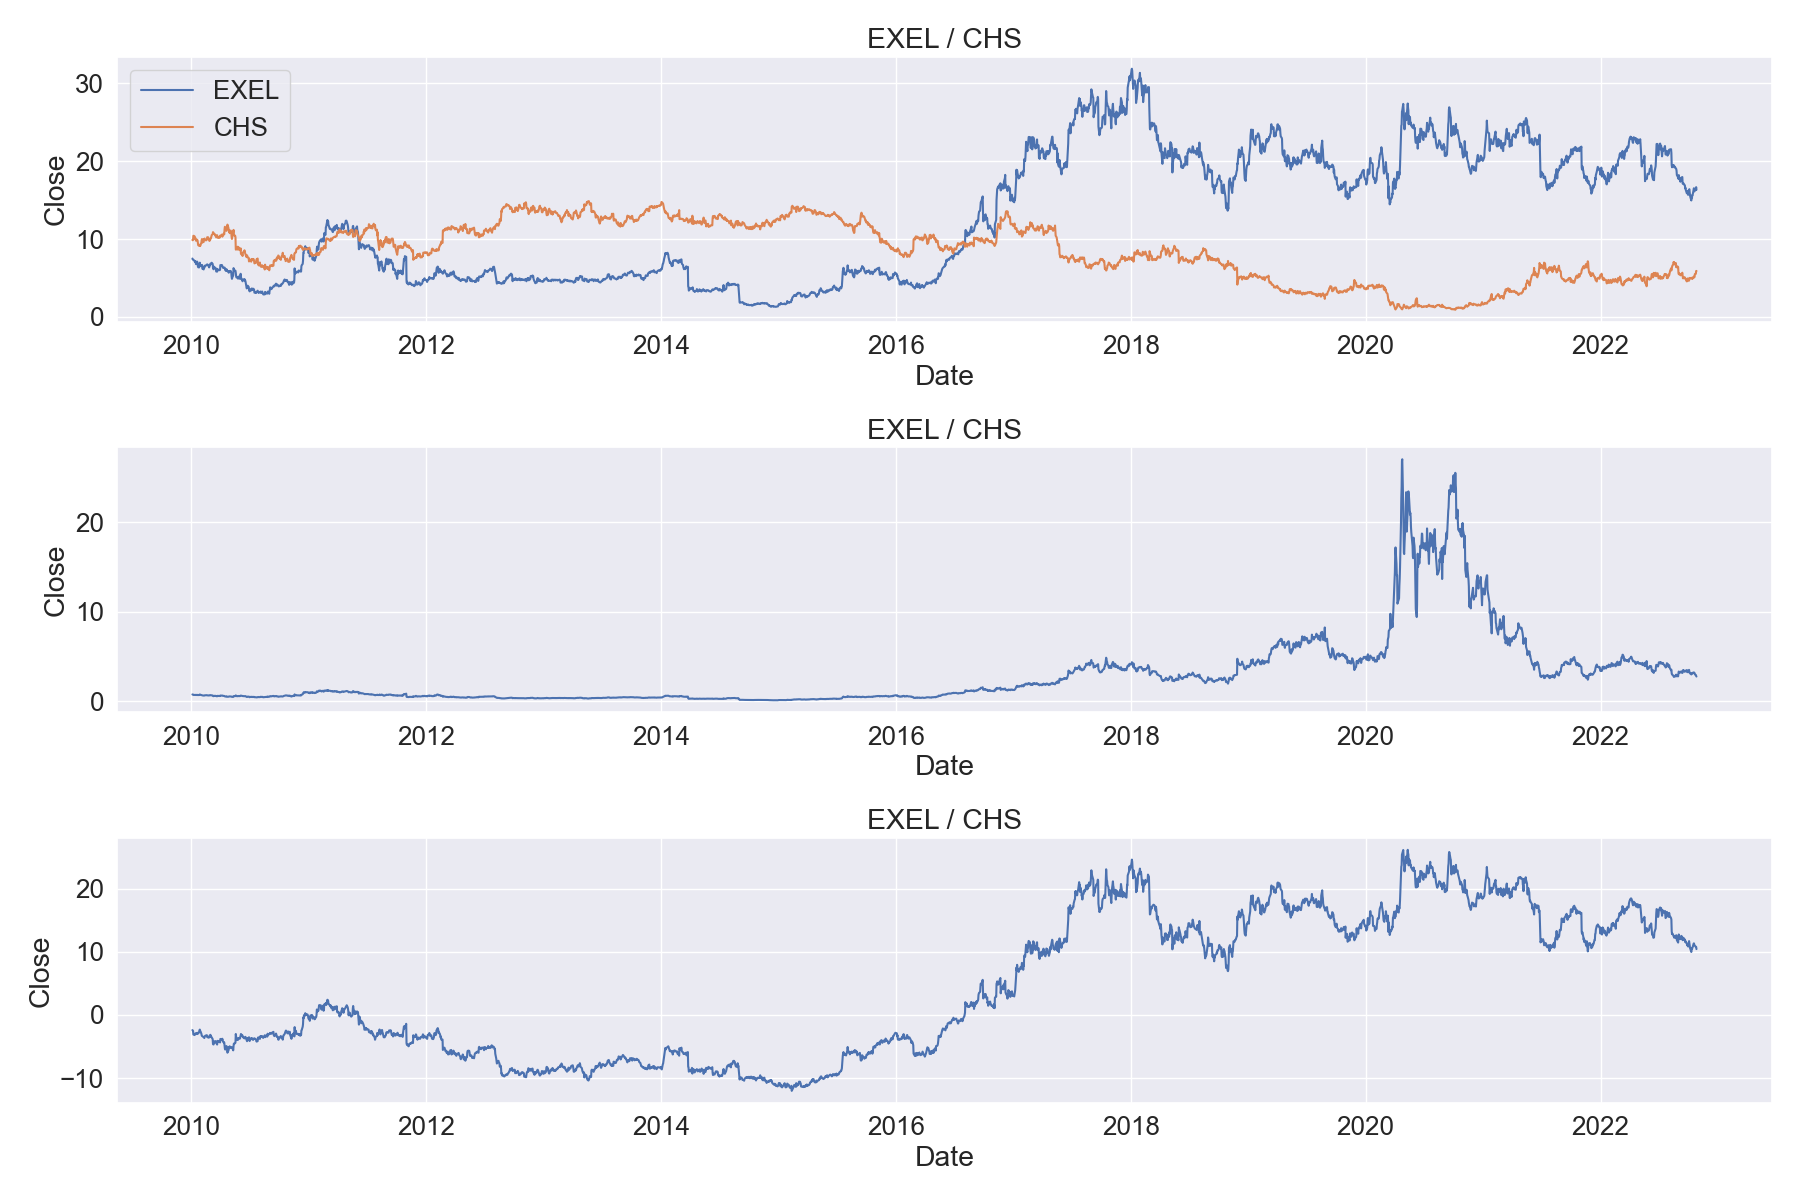

In [11]:
pair("EXEL", "CHS", "LONG position EXEL P/E ratio=18.78, dividend: None, Gross Profit: 1382097",
     "SHORT position CHS P/E ratio=6.56, dividend: None, Gross profit: 663998");

Long BETA: 0.81
Short BETA: 1.02
LONG position FULT P/E ratio=11.22, dividend: 0.034, Gross Profit: 935988
SHORT position CRK P/E ratio=14.66, dividend: None, Gross profit: 1568061


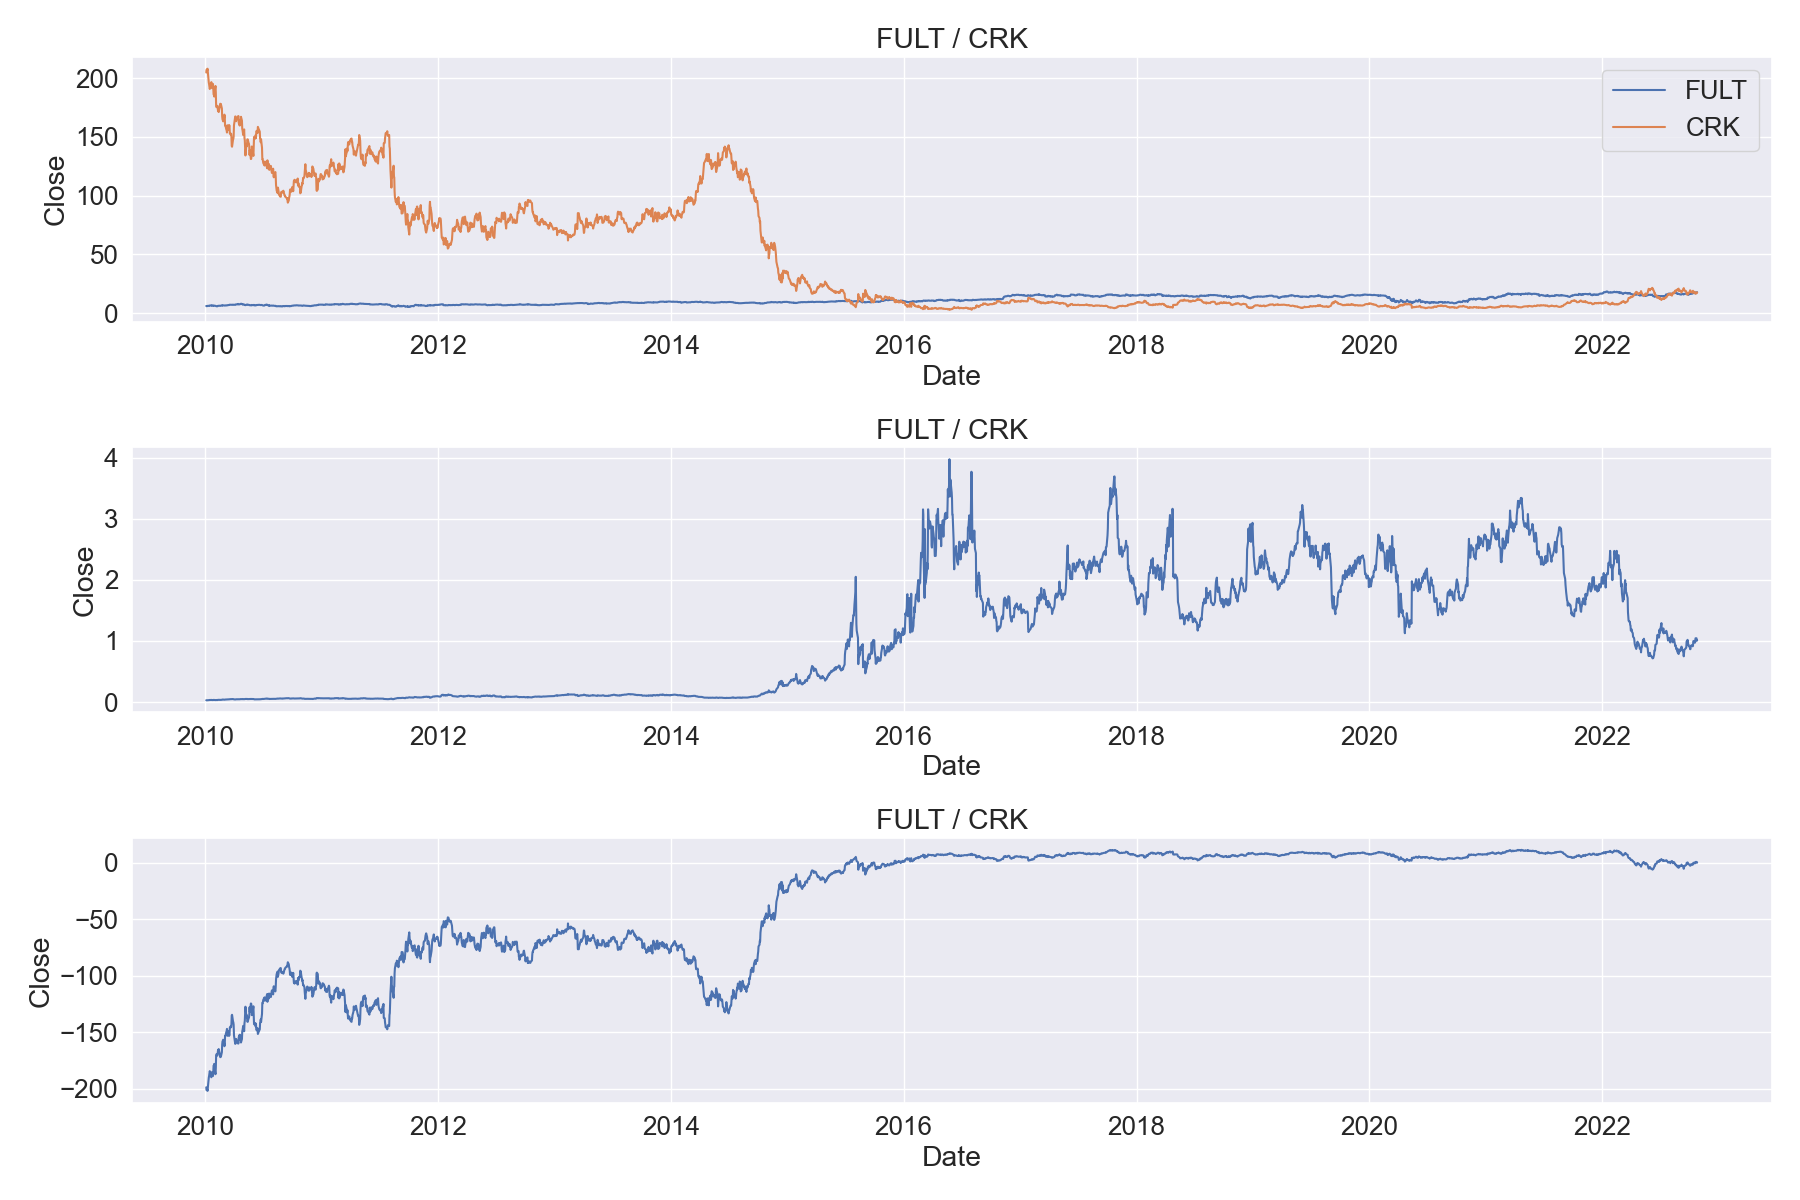

In [13]:
pair("FULT", "CRK", "LONG position FULT P/E ratio=11.22, dividend: 0.034, Gross Profit: 935988",
     "SHORT position CRK P/E ratio=14.66, dividend: None, Gross profit: 1568061");

Long BETA: 0.43
Short BETA: 1.02
LONG position GBDC P/E ratio=10.22, dividend: 0.092, Gross Profit: 307125
SHORT position CRK P/E ratio=14.66, dividend: None, Gross profit: 1568061


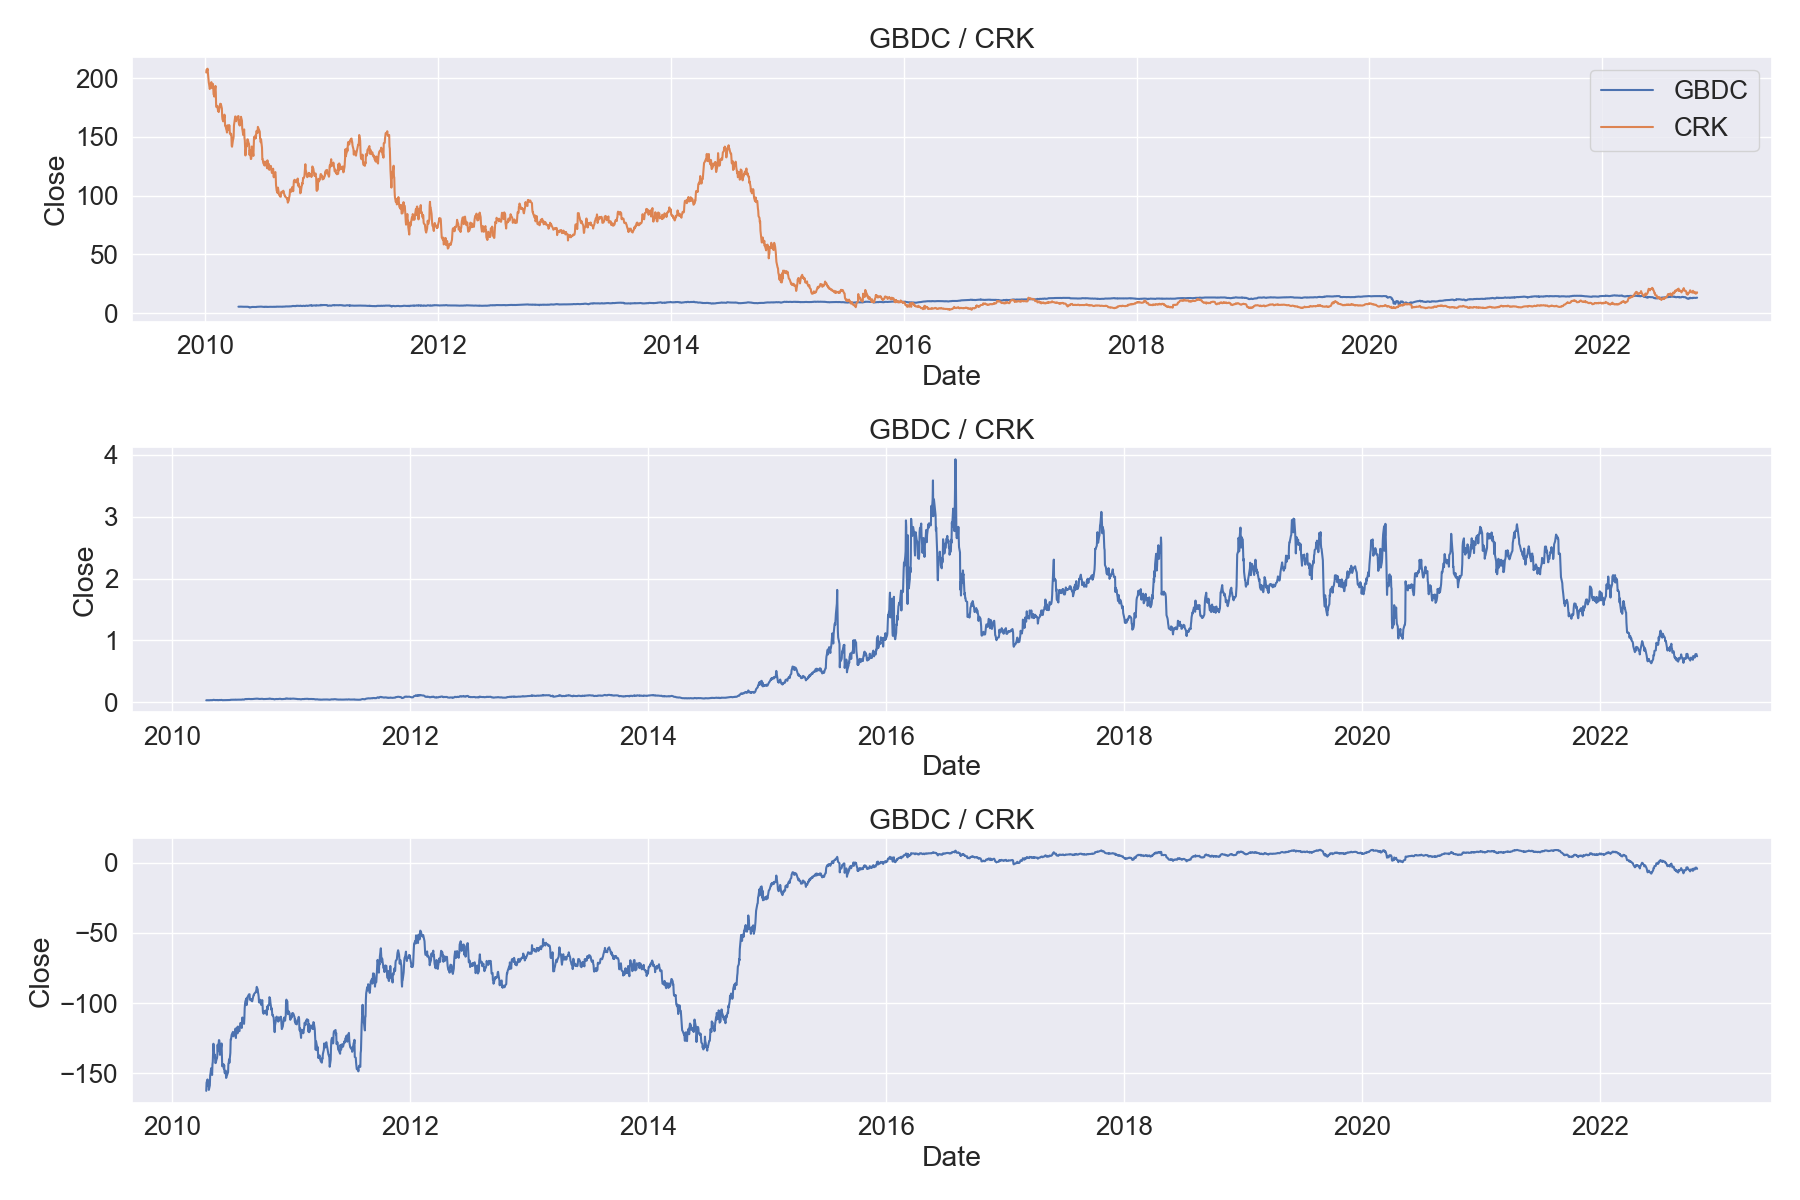

In [14]:
pair("GBDC", "CRK", "LONG position GBDC P/E ratio=10.22, dividend: 0.092, Gross Profit: 307125",
     "SHORT position CRK P/E ratio=14.66, dividend: None, Gross profit: 1568061");

Long BETA: 1.07
Short BETA: 1.02
LONG position HBAN P/E ratio=11.46, dividend: 0.041, Gross Profit: 5958000
SHORT position CRK P/E ratio=14.66, dividend: None, Gross profit: 1568061


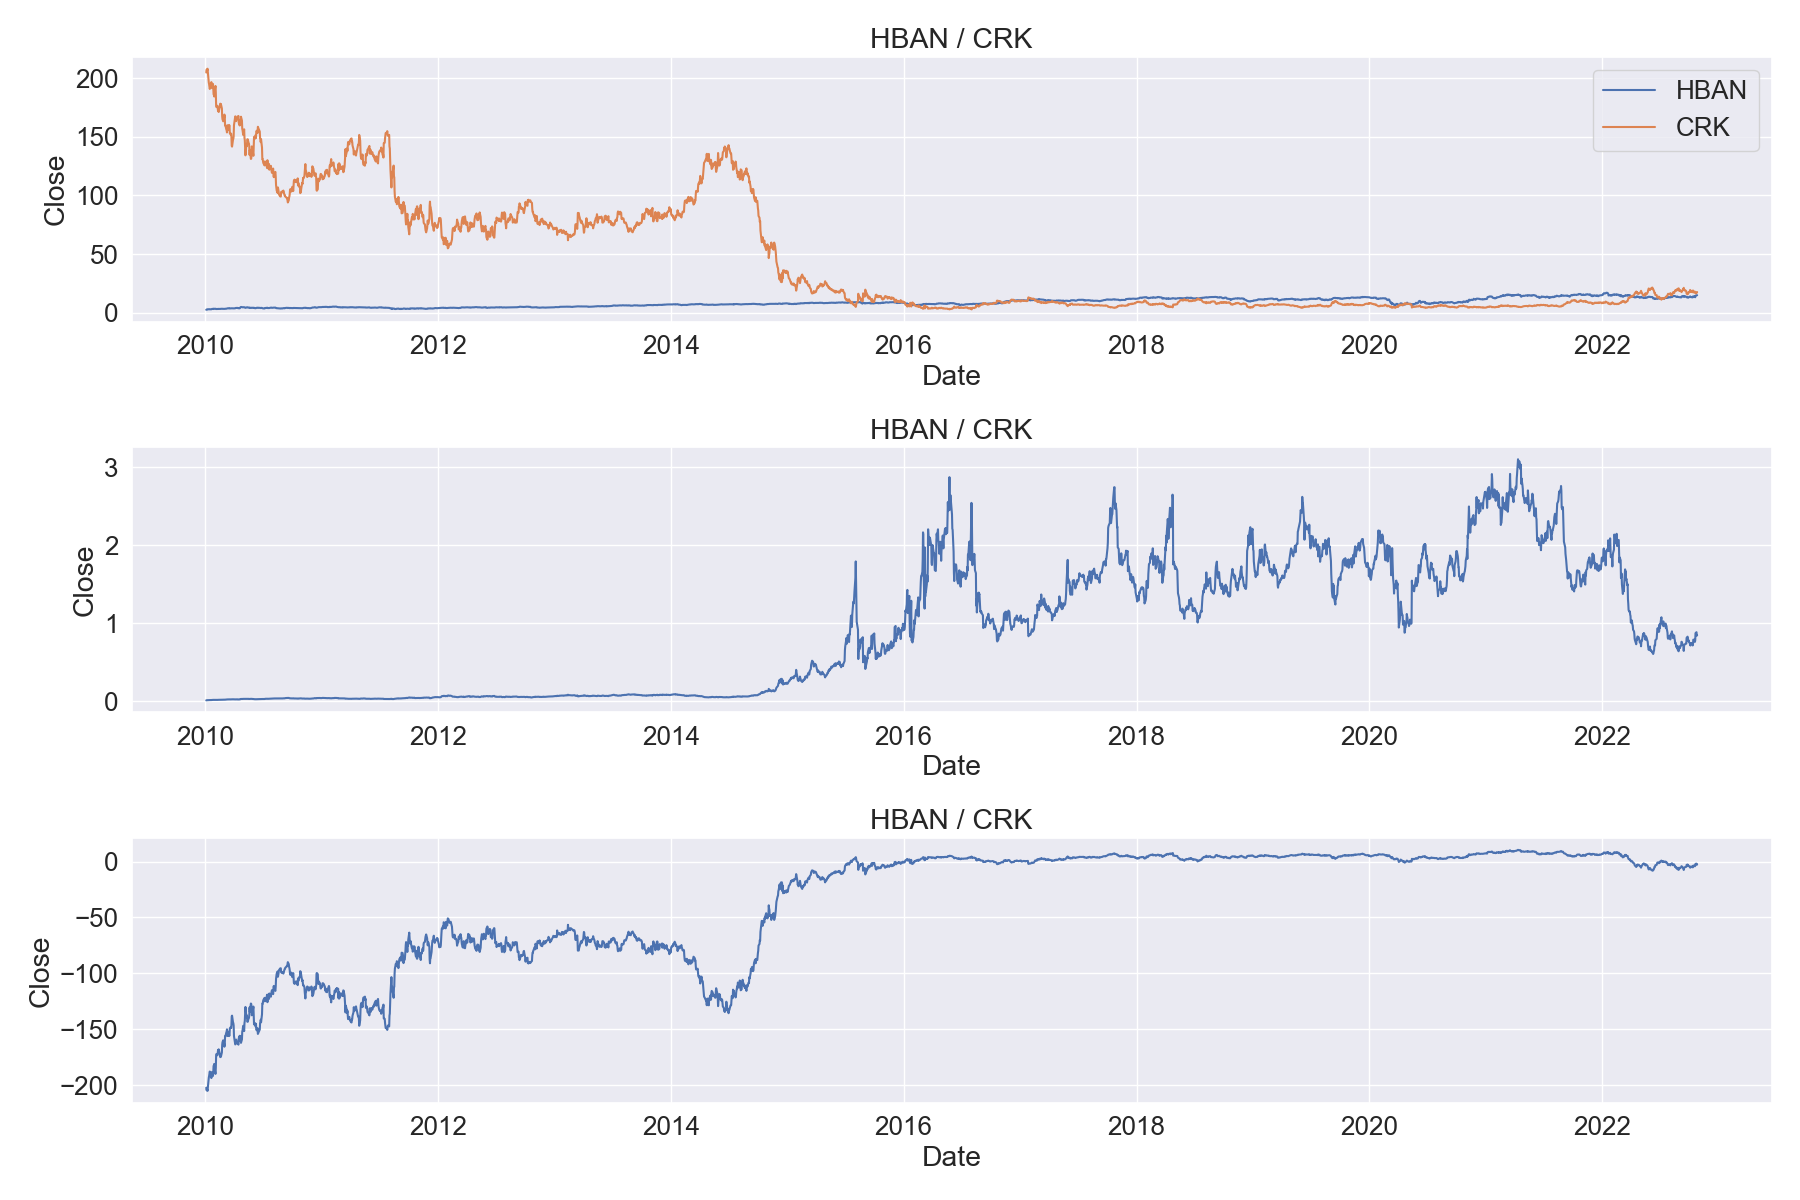

In [15]:
pair("HBAN", "CRK", "LONG position HBAN P/E ratio=11.46, dividend: 0.041, Gross Profit: 5958000",
     "SHORT position CRK P/E ratio=14.66, dividend: None, Gross profit: 1568061");

Long BETA: 0.93
Short BETA: 1.56
LONG position ABR P/E ratio = 6.47, dividend: 0.11, Gross profit: 615206
SHORT position HOUS P/E ratio=3.13, dividend: None, Gross Profit: 3230000


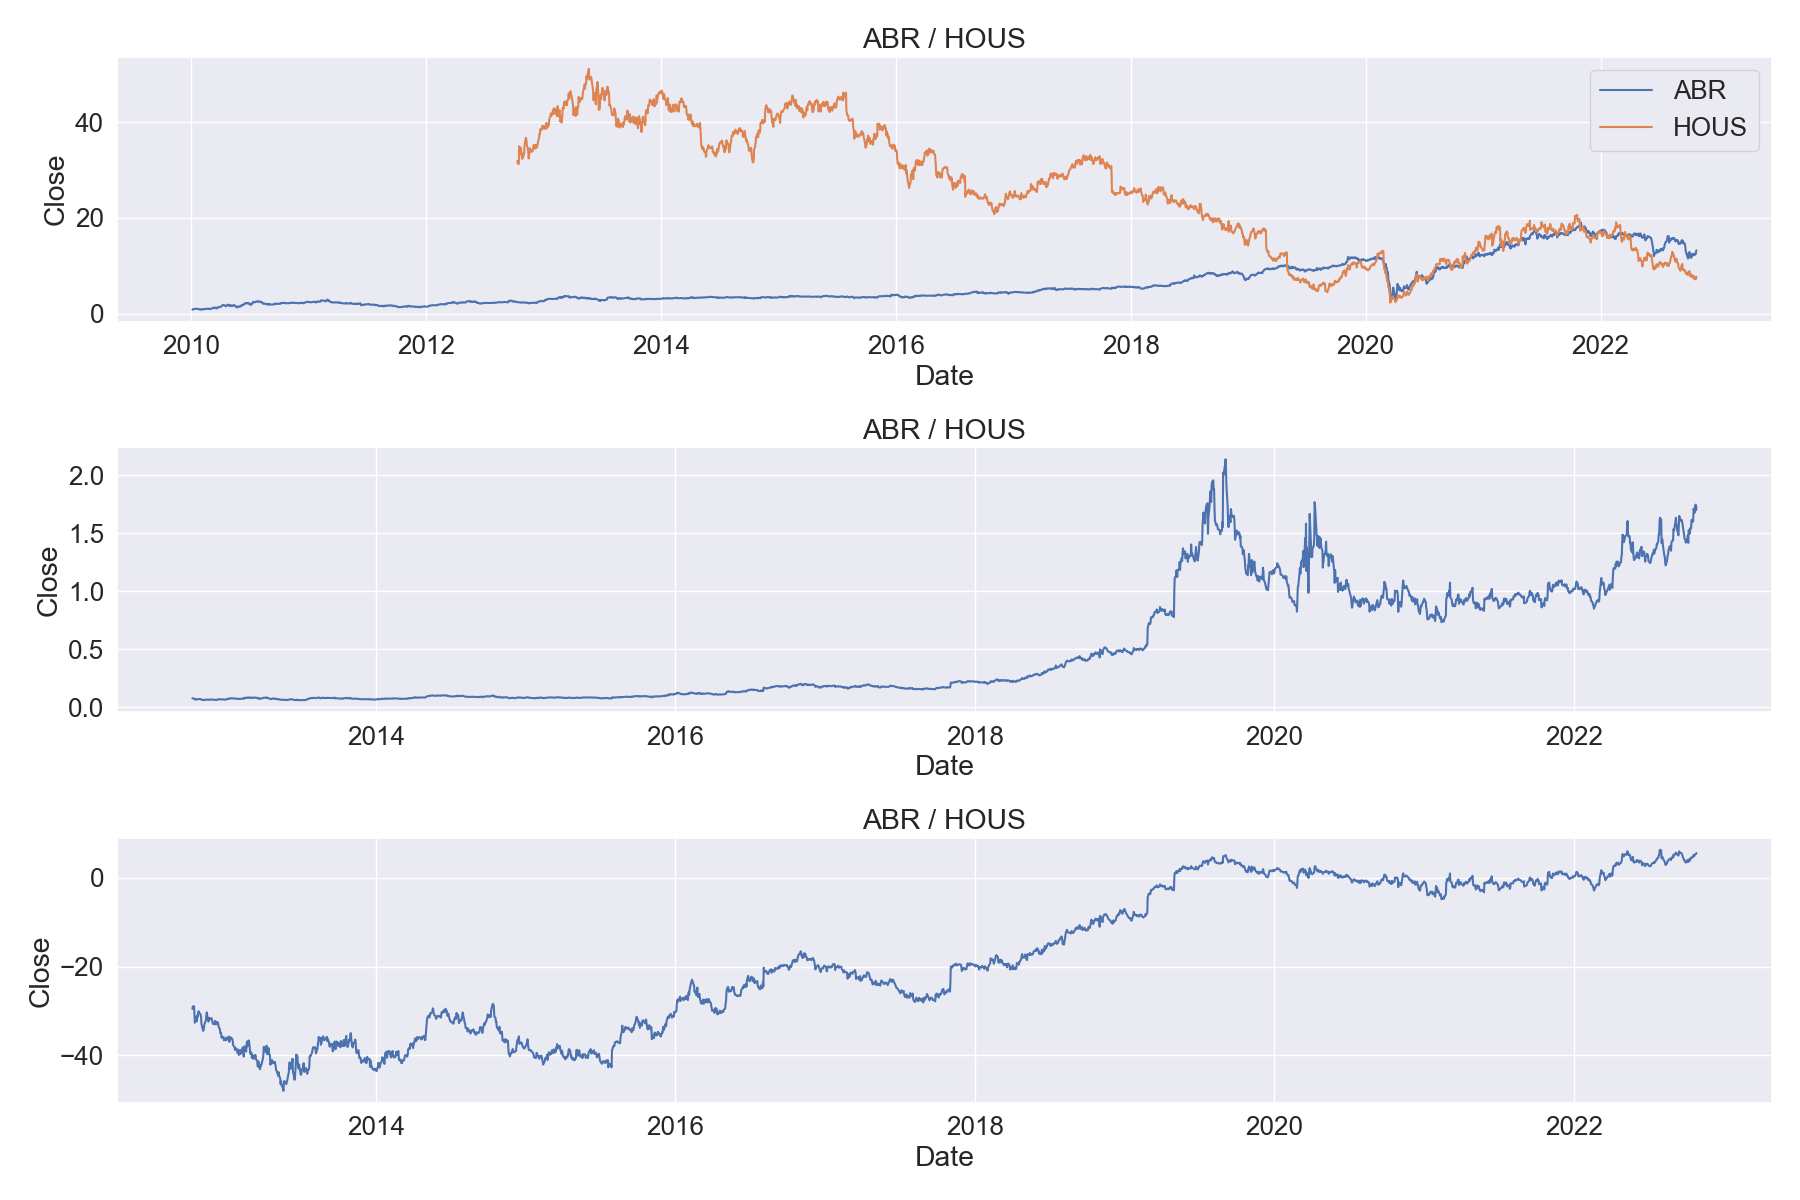

In [16]:
pair("ABR", "HOUS", "LONG position ABR P/E ratio = 6.47, dividend: 0.11, Gross profit: 615206",
     "SHORT position HOUS P/E ratio=3.13, dividend: None, Gross Profit: 3230000");

Long BETA: 0.72
Short BETA: 1.56
LONG position ARCC P/E ratio=11.45, dividend: 0.09, Gross profit: 1820000
SHORT position HOUS P/E ratio=3.13, dividend: None, Gross Profit: 3230000


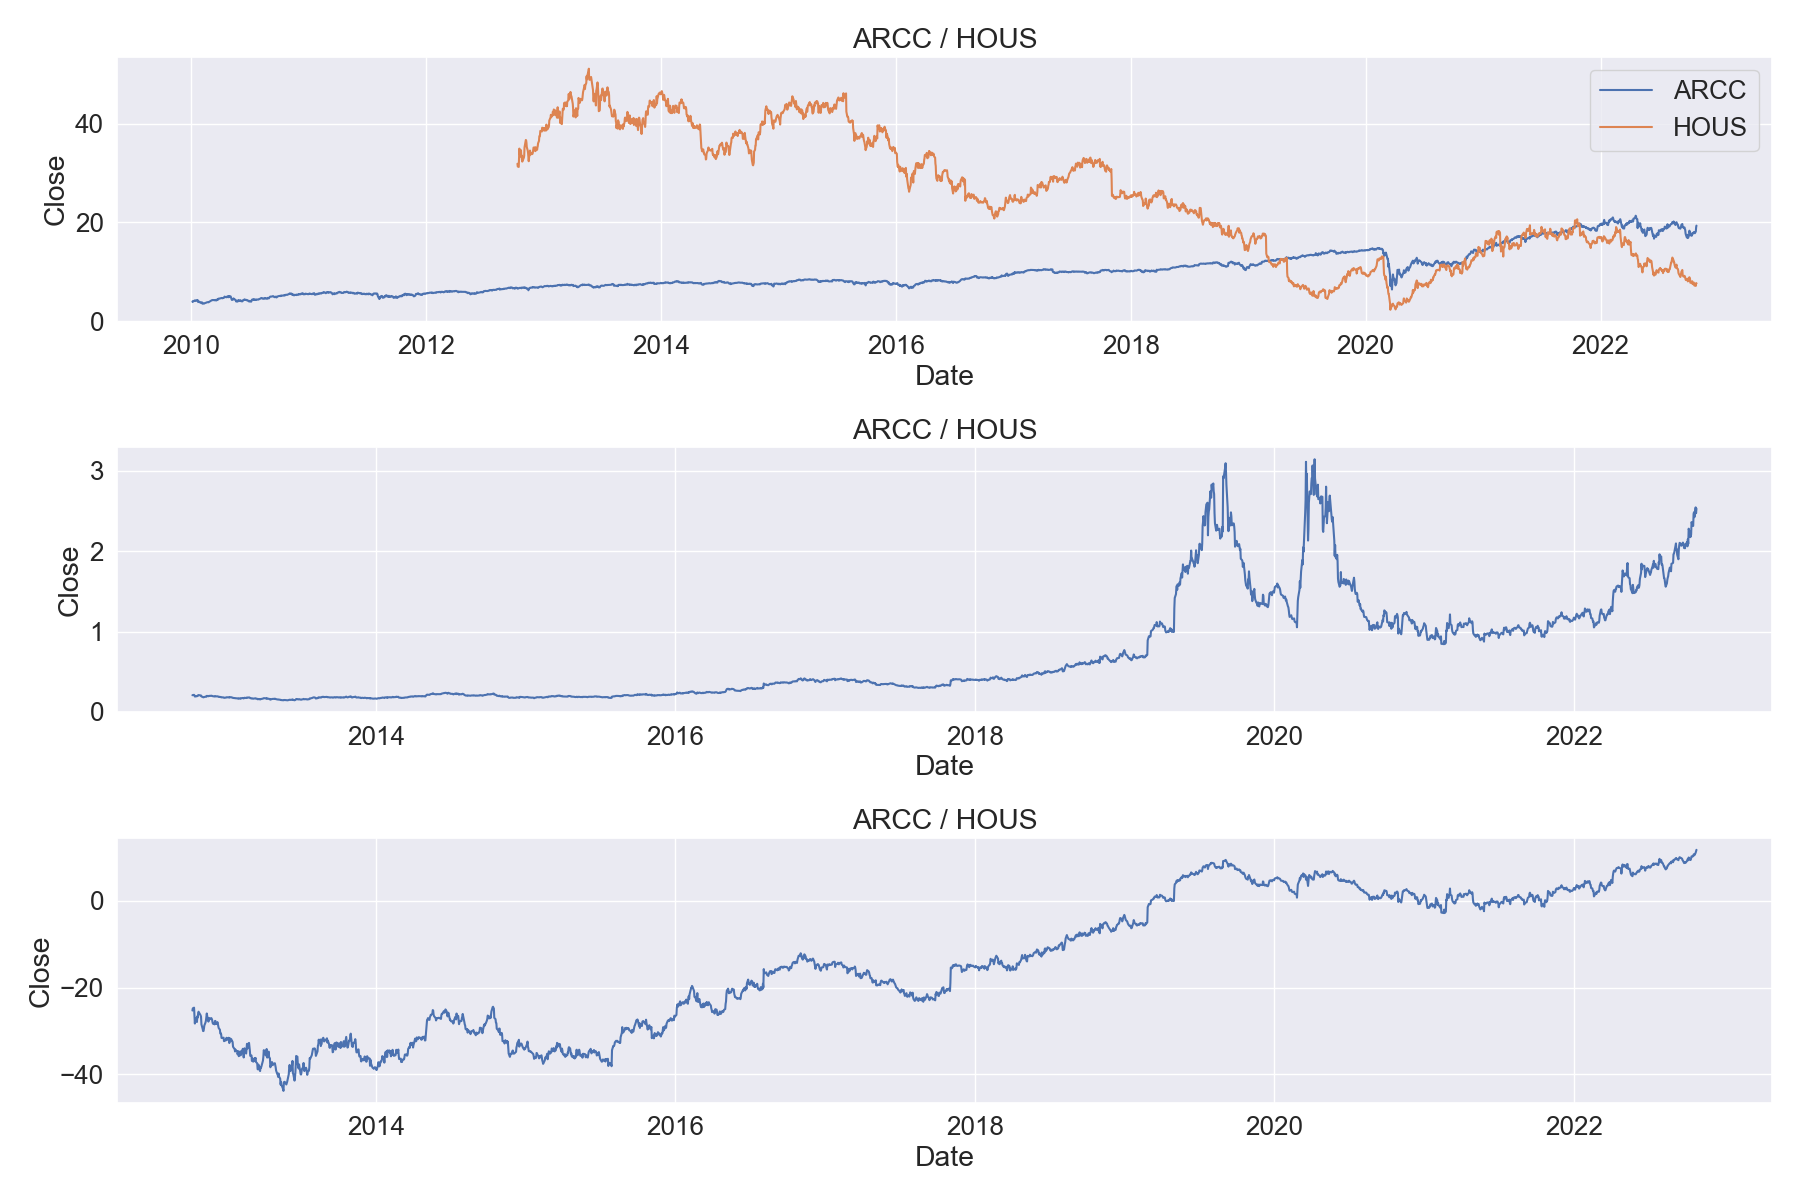

In [17]:
pair("ARCC", "HOUS", "LONG position ARCC P/E ratio=11.45, dividend: 0.09, Gross profit: 1820000",
     "SHORT position HOUS P/E ratio=3.13, dividend: None, Gross Profit: 3230000");